In [1]:
#This program uses the money flow index to determine when to buy  and sell stock

In [152]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [153]:
df= yf.Ticker('AAPL').history(start='2010-10-01',end='2022-07-20')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-09-30,8.825008,8.855544,8.588351,8.664692,673391600,0.0,0.0
2010-10-01,8.737977,8.751108,8.591403,8.627131,448142800,0.0,0.0
2010-10-04,8.599036,8.638733,8.482081,8.508649,435302000,0.0,0.0
2010-10-05,8.611252,8.838747,8.605755,8.823174,501967200,0.0,0.0
2010-10-06,8.843026,8.916314,8.710804,8.830812,670868800,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-13,142.990005,146.449997,142.119995,145.490005,71185600,0.0,0.0
2022-07-14,144.080002,148.949997,143.250000,148.470001,78140700,0.0,0.0
2022-07-15,149.779999,150.860001,148.199997,150.169998,76030800,0.0,0.0


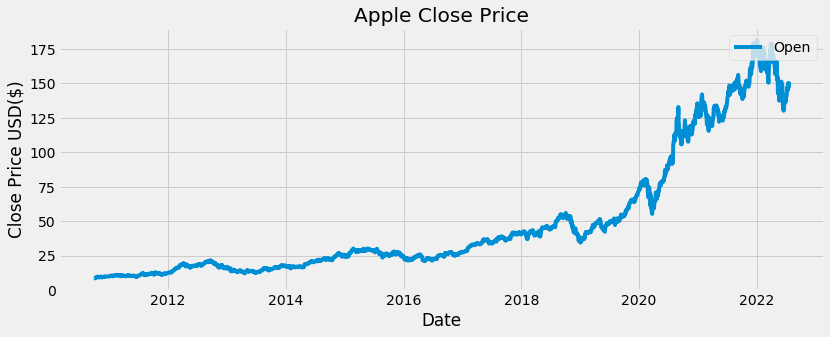

In [154]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close Price')
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(df.columns.values,loc='upper right')
plt.show()

In [155]:
#Calculate the typical Price
typical_price=(df['Close']+df['High']+df['Low'])/3
typical_price

Date
2010-09-30      8.702862
2010-10-01      8.656547
2010-10-04      8.543154
2010-10-05      8.755892
2010-10-06      8.819310
                 ...    
2022-07-13    144.686666
2022-07-14    146.889999
2022-07-15    149.743332
2022-07-18    148.446671
2022-07-19    149.713333
Length: 2970, dtype: float64

In [156]:
#Get the period
period=14

In [157]:
#Calculate the money flow
money_flow=typical_price*df['Volume']
money_flow

Date
2010-09-30    5.860434e+09
2010-10-01    3.879369e+09
2010-10-04    3.718852e+09
2010-10-05    4.395171e+09
2010-10-06    5.916600e+09
                  ...     
2022-07-13    1.029961e+10
2022-07-14    1.147809e+10
2022-07-15    1.138511e+10
2022-07-18    1.208666e+10
2022-07-19    1.239855e+10
Length: 2970, dtype: float64

In [158]:
#Get all the pssitive negattive money Flows
positive_flow=[]
negative_flow=[]
#loop through the typical price
for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        positive_flow.append(0)
        negative_flow.append(money_flow[i-1])
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [159]:
#Get all of the positive and negative money flows within the period
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    #print(i),print(period)
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))

for i in range(period-1,len(negative_flow)):
    #print(i),print(period)
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

In [160]:
#Calculate the the money flow index
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))
mfi

array([75.4916153 , 74.60740643, 73.42875019, ..., 66.34773957,
       58.24264963, 65.60083744])

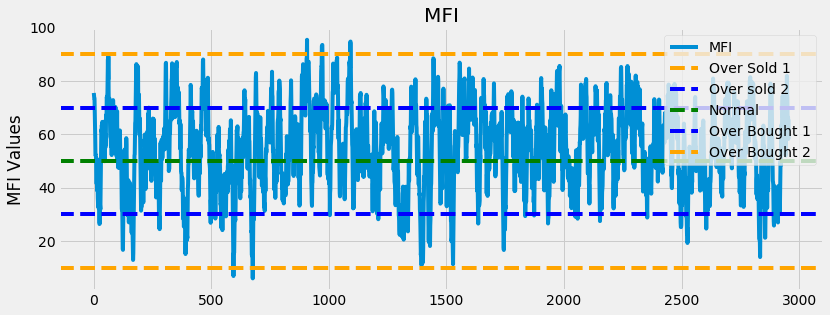

In [161]:
#Visually Show the MFI
df2=pd.DataFrame()
df2['MFI']=mfi
#create the plot
plt.figure(figsize=(12.2,4.5))
plt.plot(df2['MFI'],label='MFI')
plt.axhline(10,linestyle='--',color='Orange',label='Over Sold 1')
plt.axhline(30,linestyle='--',color='Blue',label='Over sold 2')
plt.axhline(50,linestyle='--',color='green',label='Normal')
plt.axhline(70,linestyle='--',color='blue',label='Over Bought 1')
plt.axhline(90,linestyle='--',color='Orange',label='Over Bought 2')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(loc='upper right')
plt.show()

In [162]:
#create a new data frame
new_df=pd.DataFrame()
new_df=df[period:].copy()
new_df['MFI']=mfi

In [163]:
new_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MFI
Date,,,,,,,,
2010-10-20,9.435733,9.596049,9.370691,9.482453,721624400,0.0,0.0,75.491615
2010-10-21,9.538337,9.611014,9.368555,9.451614,551460000,0.0,0.0,74.607406
2010-10-22,9.437873,9.467493,9.353288,9.389015,372778000,0.0,0.0,73.428750
2010-10-25,9.438482,9.515127,9.418632,9.430847,392462000,0.0,0.0,73.362034
2010-10-26,9.370691,9.458330,9.333436,9.406724,392929600,0.0,0.0,68.747049
...,...,...,...,...,...,...,...,...
2022-07-13,142.990005,146.449997,142.119995,145.490005,71185600,0.0,0.0,65.915618
2022-07-14,144.080002,148.949997,143.250000,148.470001,78140700,0.0,0.0,65.995479
2022-07-15,149.779999,150.860001,148.199997,150.169998,76030800,0.0,0.0,66.347740


In [164]:
#Create a function to get Buy and sell Signals
def get_signals(data,high,low):
    buy_signal=[]
    sell_signal=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return(buy_signal,sell_signal)   

In [181]:
new_df['Buy']=get_signals(new_df,65,35)[0]
new_df['Sell']=get_signals(new_df,65,35)[1]
new_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MFI,Buy,Sell
Date,,,,,,,,,,
2010-10-20,9.435733,9.596049,9.370691,9.482453,721624400,0.0,0.0,75.491615,NaN,9.482453
2010-10-21,9.538337,9.611014,9.368555,9.451614,551460000,0.0,0.0,74.607406,NaN,9.451614
2010-10-22,9.437873,9.467493,9.353288,9.389015,372778000,0.0,0.0,73.428750,NaN,9.389015
2010-10-25,9.438482,9.515127,9.418632,9.430847,392462000,0.0,0.0,73.362034,NaN,9.430847
2010-10-26,9.370691,9.458330,9.333436,9.406724,392929600,0.0,0.0,68.747049,NaN,9.406724
...,...,...,...,...,...,...,...,...,...,...
2022-07-13,142.990005,146.449997,142.119995,145.490005,71185600,0.0,0.0,65.915618,NaN,145.490005
2022-07-14,144.080002,148.949997,143.250000,148.470001,78140700,0.0,0.0,65.995479,NaN,148.470001
2022-07-15,149.779999,150.860001,148.199997,150.169998,76030800,0.0,0.0,66.347740,NaN,150.169998


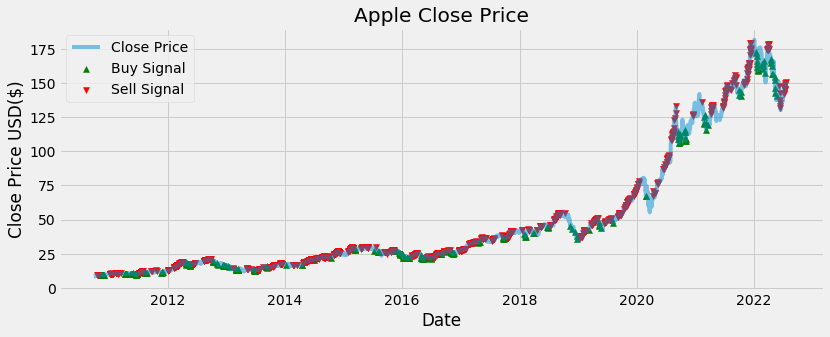

In [182]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df.index,new_df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(new_df.index,new_df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

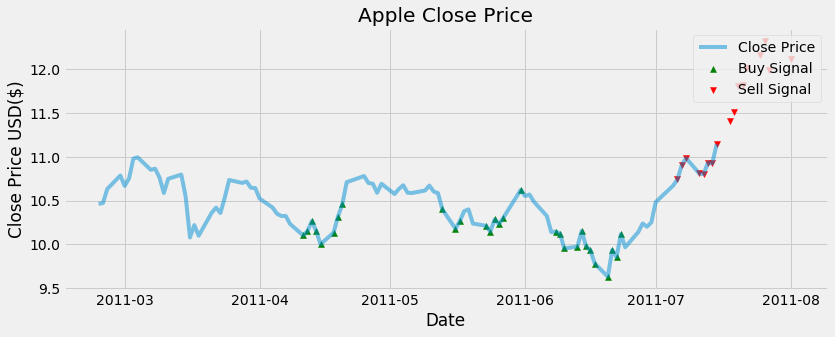

In [184]:
df1=df[100:200]
new_df1=new_df[100:200]
plt.figure(figsize=(12.2,4.5))
plt.plot(df1['Close'],label='Close Price',alpha=0.5)
plt.scatter(new_df1.index,new_df1['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(new_df1.index,new_df1['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper right')
plt.show()